In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Титаник и регрессия

In [4]:
df = pd.read_csv('train.csv',index_col='PassengerId')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,Male,22.0,1,0,7.2500,3
2,1,1,female,38.0,1,0,71.2833,1
3,1,3,female,26.0,0,0,7.9250,3
4,1,1,female,35.0,1,0,53.1000,3
5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
887,0,2,Male,27.0,0,0,13.0000,3
888,1,1,female,19.0,0,0,30.0000,3
889,0,3,female,60.0,1,2,23.4500,3


In [6]:
dft = pd.read_csv('test.csv',index_col='PassengerId')
dft

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [8]:
dft.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
dft

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,Q
893,1,3,female,47.0,1,0,7.0000,S
894,0,2,male,62.0,0,0,9.6875,Q
895,0,3,male,27.0,0,0,8.6625,S
896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1305,0,3,male,NaN,0,0,8.0500,S
1306,1,1,female,39.0,0,0,108.9000,C
1307,0,3,male,38.5,0,0,7.2500,S


In [10]:
emb_scale = {'Q': 2, 'C': 1, 'S': 3, np.nan: 1}
dft['Embarked'] = dft['Embarked'].replace(emb_scale).astype('int64')
dft['Age'] = dft['Age'].fillna(28).astype('float64')
dft['Fare'] = dft['Fare'].fillna(0).astype('float64')
print(dft.isna().sum())
dft

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\Alexandr\AppData\Local\Temp\ipykernel_19512\1277617722.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dft['Embarked'] = dft['Embarked'].replace(emb_scale).astype('int64')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,2
893,1,3,female,47.0,1,0,7.0000,3
894,0,2,male,62.0,0,0,9.6875,2
895,0,3,male,27.0,0,0,8.6625,3
896,1,3,female,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
1305,0,3,male,28.0,0,0,8.0500,3
1306,1,1,female,39.0,0,0,108.9000,1
1307,0,3,male,38.5,0,0,7.2500,3


In [12]:
df=pd.concat([df,dft])

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
sex_scale = {'female': 1, 'male': 0, 'Male': 0, 'Female': 1}
df['Sex'] = df['Sex'].replace(sex_scale).astype('int8')
df

C:\Users\Alexandr\AppData\Local\Temp\ipykernel_19512\2407882540.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(sex_scale).astype('int8')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,3
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,3
4,1,1,1,35.0,1,0,53.1000,3
5,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
1305,0,3,0,28.0,0,0,8.0500,3
1306,1,1,1,39.0,0,0,108.9000,1
1307,0,3,0,38.5,0,0,7.2500,3


<Axes: >

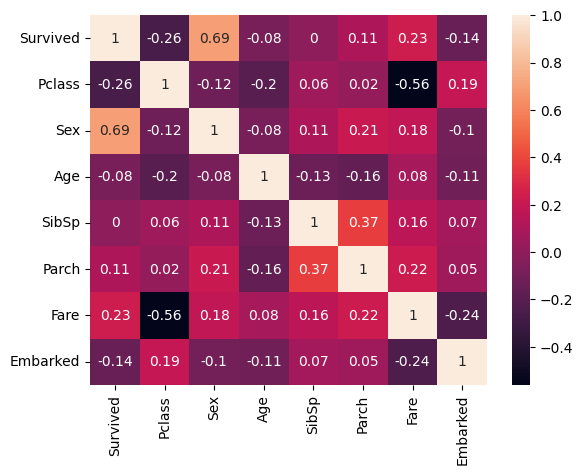

In [18]:
dfc=df.corr().round(2)
sns.heatmap(data=dfc,annot=True)

In [20]:
Y=df['Survived']
Y

PassengerId
1       0
2       1
3       1
4       1
5       0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 1307, dtype: int64

In [22]:
X=df.drop(['Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,3
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,3
4,1,1,35.0,1,0,53.1000,3
5,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
1305,3,0,28.0,0,0,8.0500,3
1306,1,1,39.0,0,0,108.9000,1
1307,3,0,38.5,0,0,7.2500,3


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1176, 7)
(131, 7)
(1176,)
(131,)


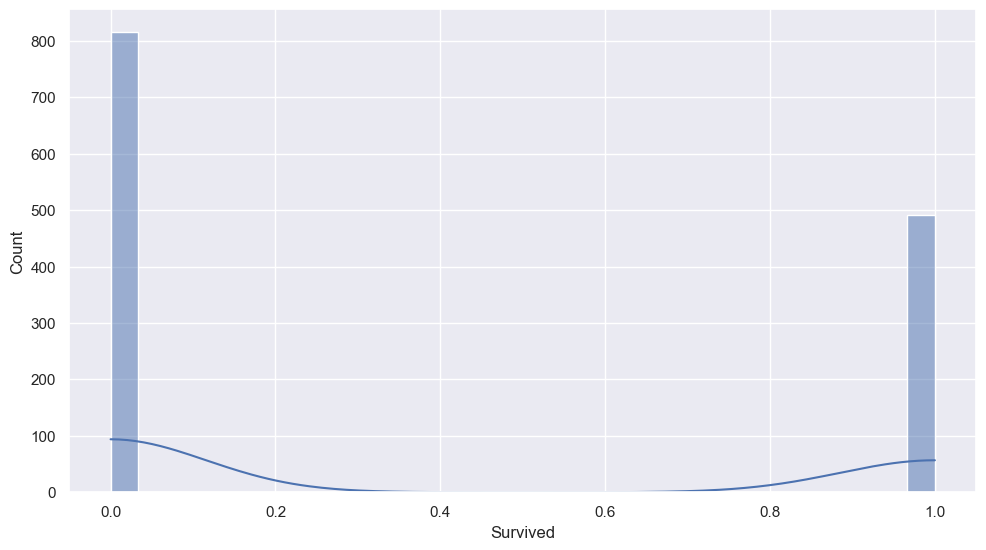

In [28]:
sns.set(rc={'figure.figsize':(11.7, 6.27)})
sns.histplot(Y, bins=30, kde=True)
plt.show()

## LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mm = LinearRegression()
histf = mm.fit(X_train, Y_train)

In [33]:
y_predict = mm.predict(X_train)
rmsef = (np.sqrt(mean_squared_error(Y_train,y_predict)))
r2f = r2_score(Y_train, y_predict)

print("The model perfomance for training set")
print("-------------------------------------")
print("RMSE is {}".format(rmsef))
print("R2 score is {}".format(r2f))
print("\n")

The model perfomance for training set
-------------------------------------
RMSE is 0.3357022240955421
R2 score is 0.5208784637061531




In [35]:
y_test_predict = mm.predict(X_test)
rmsef = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2f = r2_score(Y_test, y_test_predict)

print("The model perfomance for test set")
print("-------------------------------------")
print("RMSE is {}".format(rmsef))
print("R2 score is {}".format(r2f))
print("\n")

The model perfomance for test set
-------------------------------------
RMSE is 0.346504125327939
R2 score is 0.47810604526197675




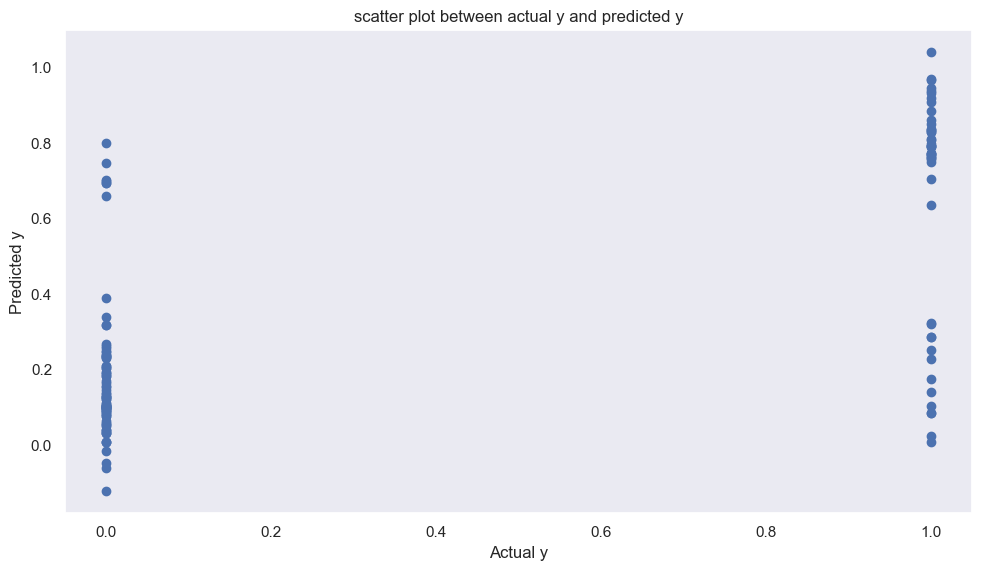

Mean Squared Error : 0.346504125327939
r2_score : 0.47810604526197675


In [37]:
plt.scatter(Y_test, mm.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("scatter plot between actual y and predicted y")
plt.show()
print('Mean Squared Error :',np.sqrt(mean_squared_error(Y_test, mm.predict(X_test))))
print('r2_score :',r2_score(Y_test, mm.predict(X_test)))

In [39]:
from sklearn.tree import DecisionTreeRegressor

decisiontree = DecisionTreeRegressor(random_state=0)
mm1 = decisiontree.fit(X_train,Y_train)
y1_pred=mm1.predict(X_test)

In [41]:
rmse = (np.sqrt(mean_squared_error(Y_test,y1_pred)))
r2 = r2_score(Y_test, y1_pred)

print("The model perfomance for test set")
print("-------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

The model perfomance for test set
-------------------------------------
RMSE is 0.4102907708365886
R2 score is 0.26827323101554745




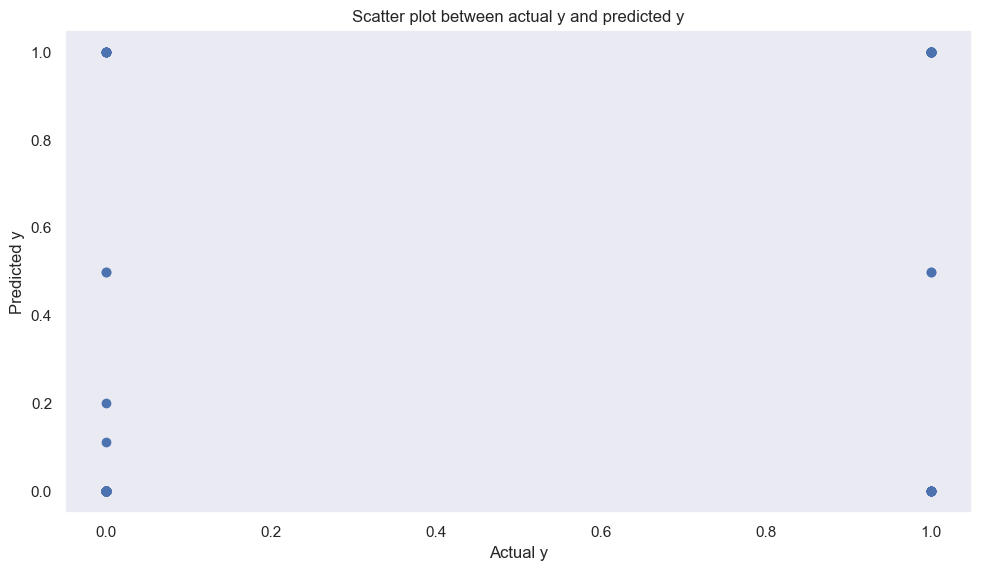

Mean Squared Error: 0.4102907708365886
R2 Score: 0.26827323101554745


In [43]:
plt.scatter(Y_test, decisiontree.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Scatter plot between actual y and predicted y")
plt.show()

print('Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, decisiontree.predict(X_test))))
print('R2 Score:', r2_score(Y_test, decisiontree.predict(X_test)))

# Дома в Калифорнии

In [46]:
from sklearn.datasets import fetch_california_housing

california_housing_dataset = fetch_california_housing()
print(california_housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [48]:
from sklearn.datasets import fetch_california_housing

data,target = fetch_california_housing(return_X_y=True)

X = pd.DataFrame(data, columns= fetch_california_housing()['feature_names'])
Y = pd.Series(target, name='class')

housing_df = pd.concat([X, Y], axis=1)

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
class         0
dtype: int64

<Axes: >

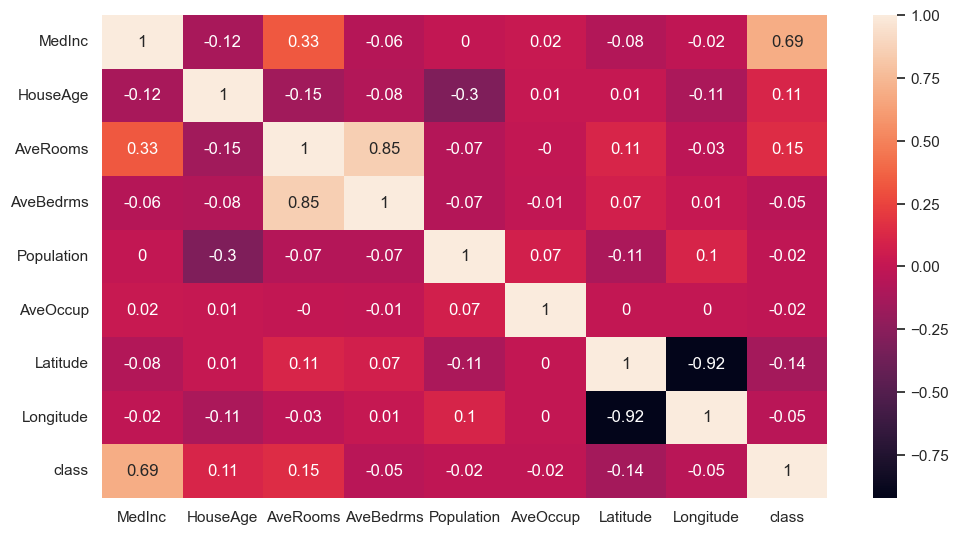

In [52]:
dfc=housing_df.corr().round(2)
sns.heatmap(data=dfc,annot=True)

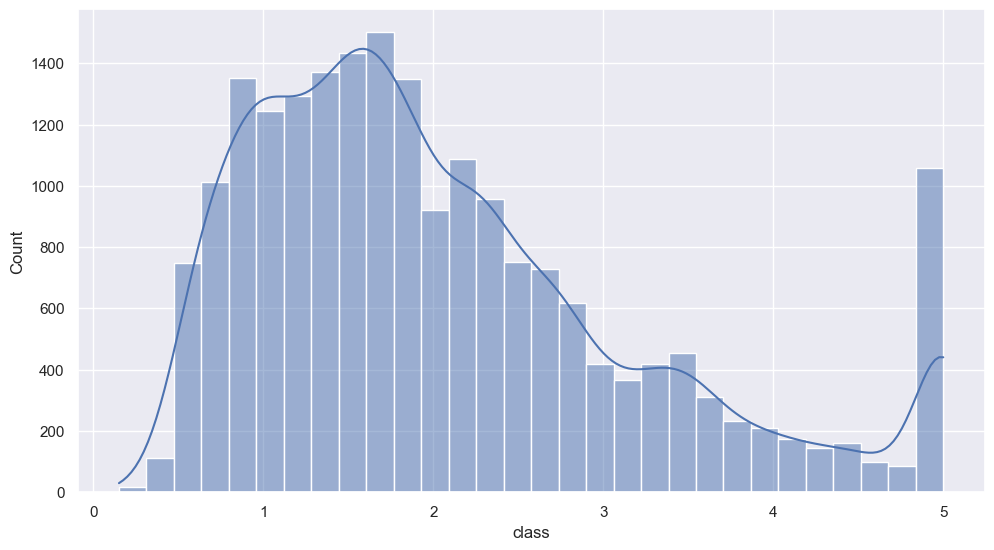

In [54]:
sns.set(rc={'figure.figsize':(11.7, 6.27)})
sns.histplot(Y, bins=30, kde=True)
plt.show()

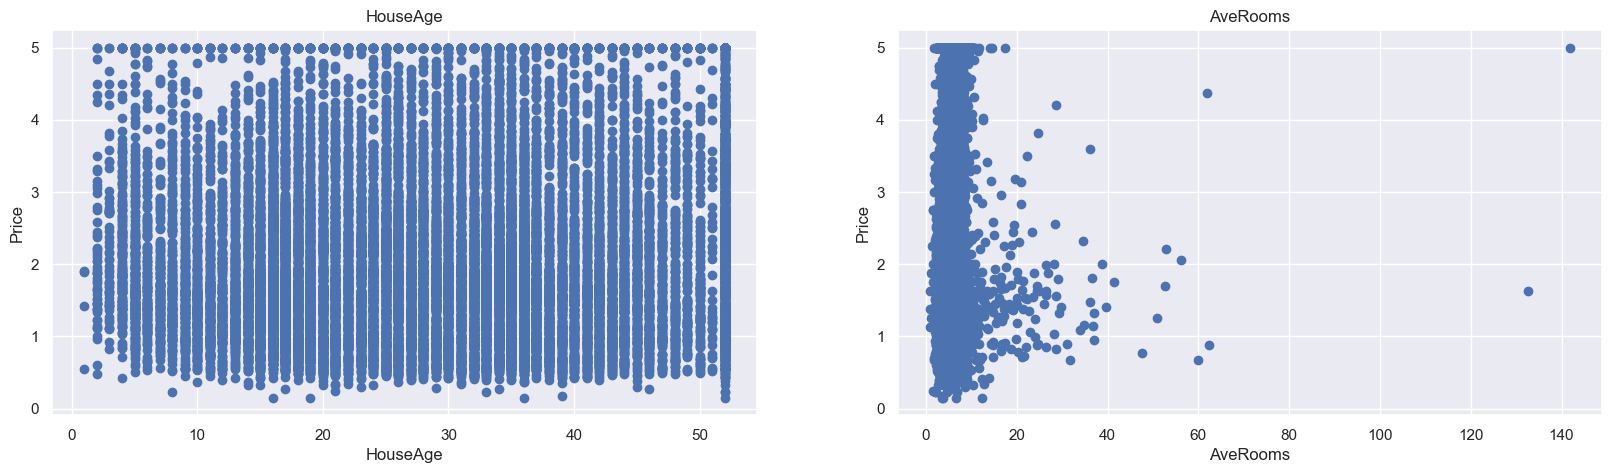

In [56]:
plt.figure(figsize=(20,5))

features = ['HouseAge', 'AveRooms']

for i, col in enumerate(features):
  plt.subplot(1,len(features), i+1)
  x = X[col]
  y = Y
  plt.scatter(x,y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('Price')

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(18576, 8)
(2064, 8)
(18576,)
(2064,)


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LinearRegression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mm = LinearRegression()
histf = mm.fit(X_train, Y_train)

In [65]:
y_predict = mm.predict(X_train)
rmsef = (np.sqrt(mean_squared_error(Y_train,y_predict)))
r2f = r2_score(Y_train, y_predict)

print("The model perfomance for training set")
print("-------------------------------------")
print("RMSE is {}".format(rmsef))
print("R2 score is {}".format(r2f))
print("\n")

The model perfomance for training set
-------------------------------------
RMSE is 0.7219094282619752
R2 score is 0.6056860137637039




In [67]:
y_test_predict = mm.predict(X_test)
rmsef = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2f = r2_score(Y_test, y_test_predict)

print("The model perfomance for test set")
print("-------------------------------------")
print("RMSE is {}".format(rmsef))
print("R2 score is {}".format(r2f))
print("\n")

The model perfomance for test set
-------------------------------------
RMSE is 0.7440273028687344
R2 score is 0.6097088137329847




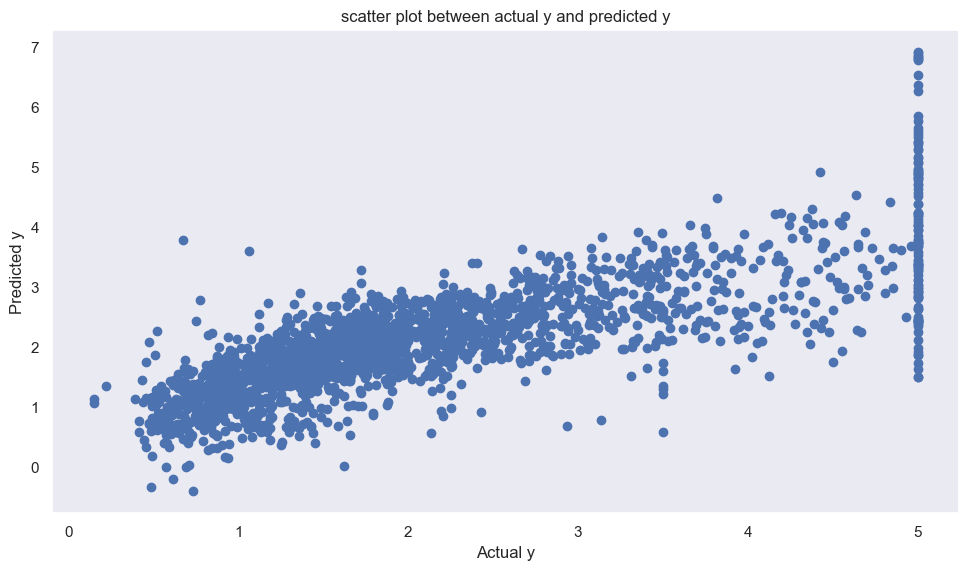

Mean Squared Error : 0.7440273028687344
r2_score : 0.6097088137329847


In [69]:
plt.scatter(Y_test, mm.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("scatter plot between actual y and predicted y")
plt.show()
print('Mean Squared Error :',np.sqrt(mean_squared_error(Y_test, mm.predict(X_test))))
print('r2_score :',r2_score(Y_test, mm.predict(X_test)))

### Поиск оптимальных гиперпараметров

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(mm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

print("Наилучшие гиперпараметры:", grid_search.best_params_)

Наилучшие гиперпараметры: {'fit_intercept': True, 'positive': False}


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mm = LinearRegression(fit_intercept= True, positive= True)
histf = mm.fit(X_train, Y_train)

y_predict = mm.predict(X_train)
rmsef = (np.sqrt(mean_squared_error(Y_train,y_predict)))
r2f = r2_score(Y_train, y_predict)

print("The model perfomance for training set")
print("-------------------------------------")
print("RMSE is {}".format(rmsef))
print("R2 score is {}".format(r2f))
print("\n")

The model perfomance for training set
-------------------------------------
RMSE is 0.8057532140431369
R2 score is 0.5087745636246743




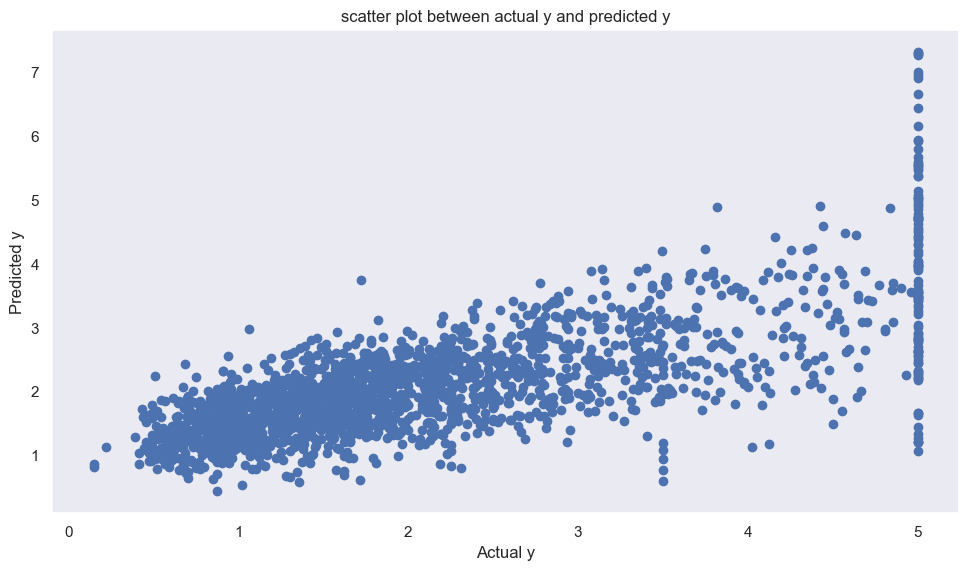

Mean Squared Error : 0.8238431642142068
r2_score : 0.5214800115991398


In [76]:
plt.scatter(Y_test, mm.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("scatter plot between actual y and predicted y")
plt.show()
print('Mean Squared Error :',np.sqrt(mean_squared_error(Y_test, mm.predict(X_test))))
print('r2_score :',r2_score(Y_test, mm.predict(X_test)))

## DecisionTreeRegression

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
decisiontree = DecisionTreeRegressor(random_state=0)
mm1 = decisiontree.fit(X_train,Y_train)
y1_pred=mm1.predict(X_test)

In [83]:
rmse = (np.sqrt(mean_squared_error(Y_test,y1_pred)))
r2 = r2_score(Y_test, y1_pred)

print("The model perfomance for test set")
print("-------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

The model perfomance for test set
-------------------------------------
RMSE is 0.7250619517270228
R2 score is 0.6293523678973081




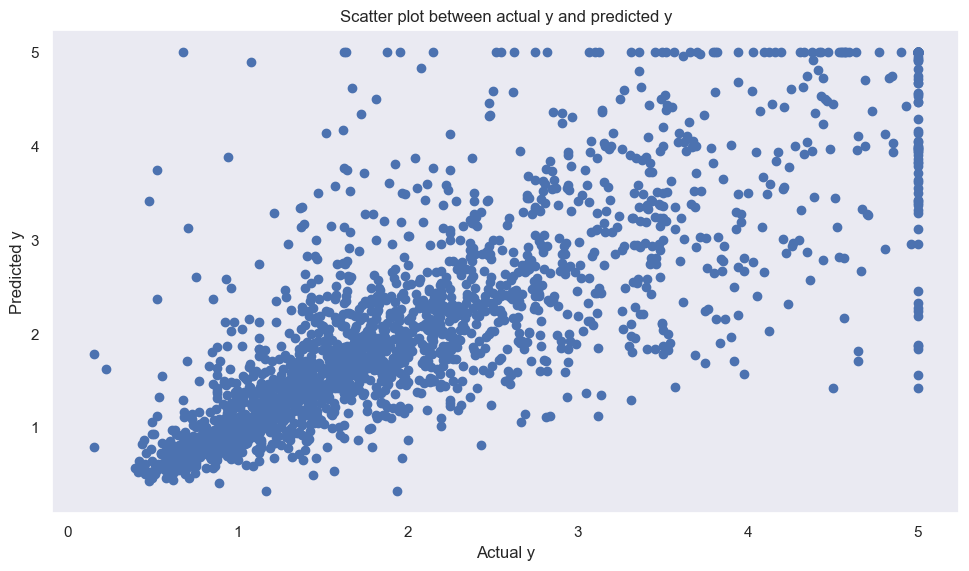

Mean Squared Error: 0.7250619517270228
R2 Score: 0.6293523678973081


In [85]:
plt.scatter(Y_test, decisiontree.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Scatter plot between actual y and predicted y")
plt.show()

print('Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, decisiontree.predict(X_test))))
print('R2 Score:', r2_score(Y_test, decisiontree.predict(X_test)))

### Поиск оптимальных гиперпараметров

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(mm1, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

print("Наилучшие гиперпараметры:", grid_search.best_params_)

Наилучшие гиперпараметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [90]:
grid_search.best_score_

-0.39721205436010204

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

decisiontree = DecisionTreeRegressor(random_state=0,max_depth= 5, min_samples_leaf= 4, min_samples_split= 10)
mm1 = decisiontree.fit(X_train,Y_train)
y1_pred=mm1.predict(X_test)

In [94]:
rmse = (np.sqrt(mean_squared_error(Y_test,y1_pred)))
r2 = r2_score(Y_test, y1_pred)

print("The model perfomance for test set")
print("-------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

The model perfomance for test set
-------------------------------------
RMSE is 0.7258860724015888
R2 score is 0.6285093172556997




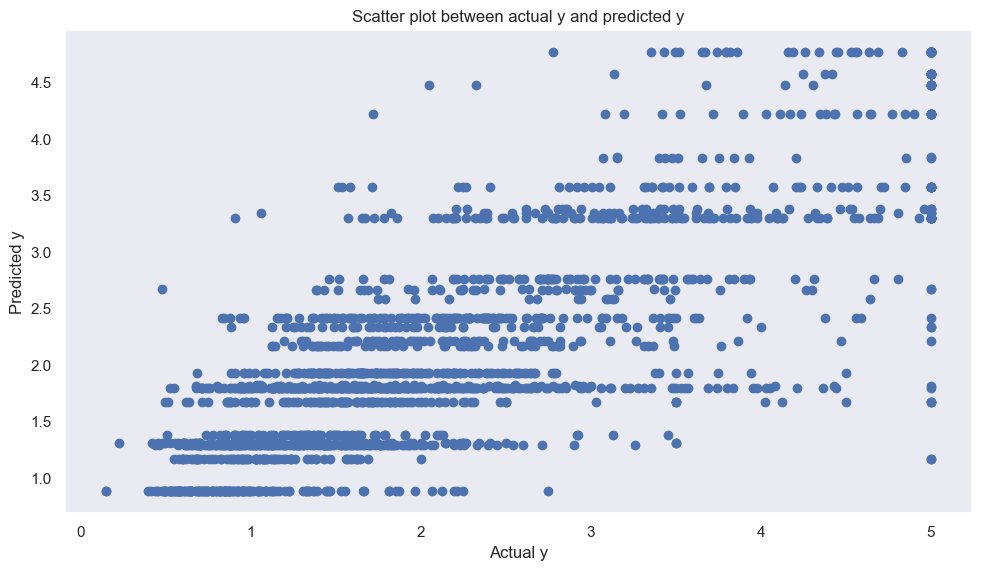

Mean Squared Error: 0.7258860724015888
R2 Score: 0.6285093172556997


In [96]:
plt.scatter(Y_test, decisiontree.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Scatter plot between actual y and predicted y")
plt.show()

print('Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, decisiontree.predict(X_test))))
print('R2 Score:', r2_score(Y_test, decisiontree.predict(X_test)))

## RandomForestRegression

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
mm2=RandomForestRegressor(random_state=0,n_jobs=-1)
mm2.fit(X_train,Y_train)
y2_pred=mm2.predict(X_test)

In [103]:
rmse = (np.sqrt(mean_squared_error(Y_test,y2_pred)))
r2 = r2_score(Y_test, y2_pred)

print("The model perfomance for test set")
print("-------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

The model perfomance for test set
-------------------------------------
RMSE is 0.5023363076841407
R2 score is 0.8220900913685089




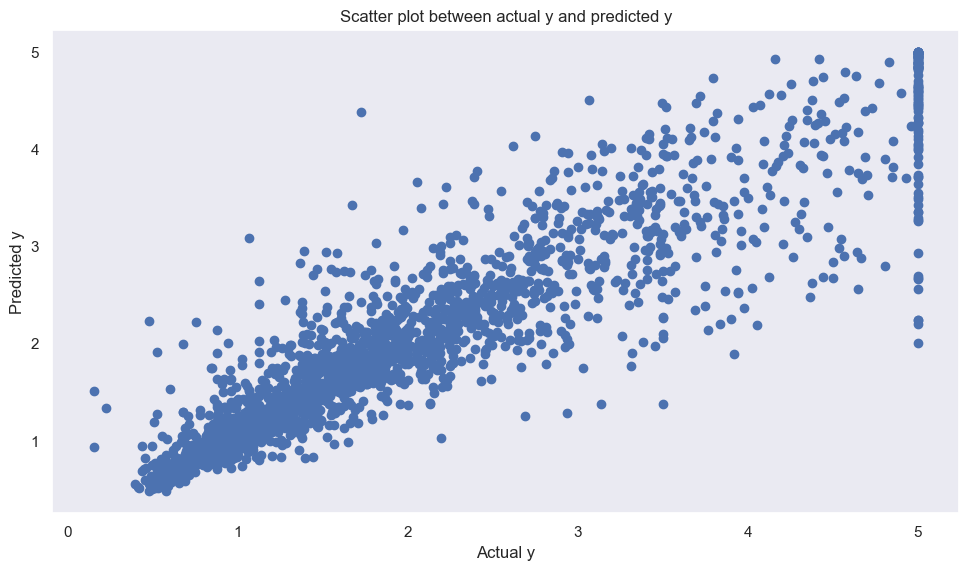

Mean Squared Error: 0.5023363076841407
R2 Score: 0.8220900913685089


In [105]:
plt.scatter(Y_test, mm2.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Scatter plot between actual y and predicted y")
plt.show()

print('Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, mm2.predict(X_test))))
print('R2 Score:', r2_score(Y_test, mm2.predict(X_test)))

### Поиск оптимальных гиперпараметров


In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(mm2, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

print("Наилучшие гиперпараметры:", grid_search.best_params_)

Наилучшие гиперпараметры: {'max_depth': None, 'min_samples_split': 2}


In [110]:
grid_search.best_score_

-0.2566033264845289

In [112]:
mm2=RandomForestRegressor(random_state=0,n_jobs=-1)
mm2.fit(X_train,Y_train)
y2_pred=mm2.predict(X_test)

In [114]:
rmse = (np.sqrt(mean_squared_error(Y_test,y2_pred)))
r2 = r2_score(Y_test, y2_pred)

print("The model perfomance for test set")
print("-------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

The model perfomance for test set
-------------------------------------
RMSE is 0.5023363076841407
R2 score is 0.822090091368509




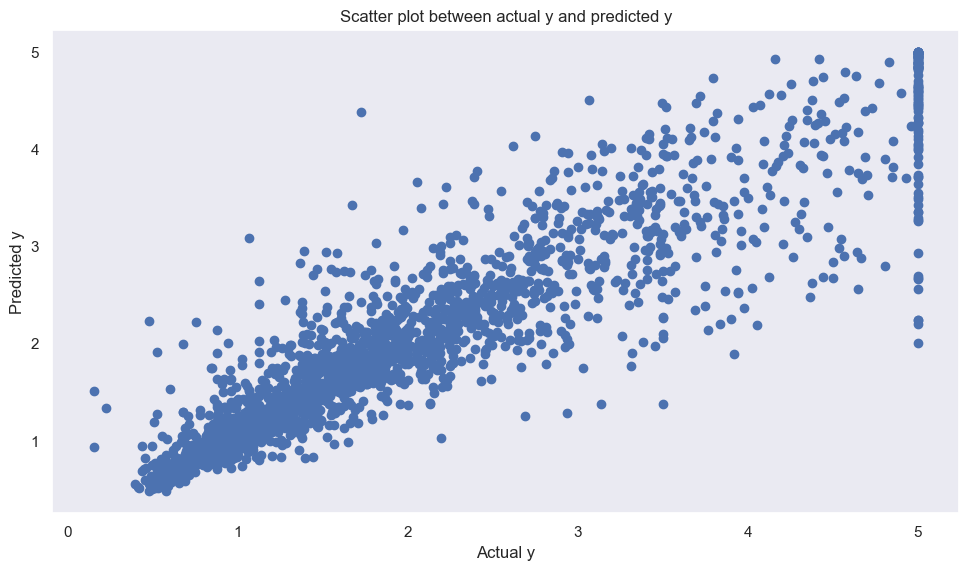

Mean Squared Error: 0.5023363076841407
R2 Score: 0.8220900913685089


In [116]:
plt.scatter(Y_test, mm2.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Scatter plot between actual y and predicted y")
plt.show()

print('Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, mm2.predict(X_test))))
print('R2 Score:', r2_score(Y_test, mm2.predict(X_test)))

## AdaBoostRegressor

In [119]:
from sklearn.ensemble import AdaBoostRegressor

In [121]:
mm3=AdaBoostRegressor(random_state=1)
mm3.fit(X_train,Y_train)
y3_pred=mm3.predict(X_test)

In [123]:
rmse = (np.sqrt(mean_squared_error(Y_test,y3_pred)))
r2 = r2_score(Y_test, y3_pred)

print("The model perfomance for test set")
print("-------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

The model perfomance for test set
-------------------------------------
RMSE is 0.8862409981823095
R2 score is 0.4462488101610703




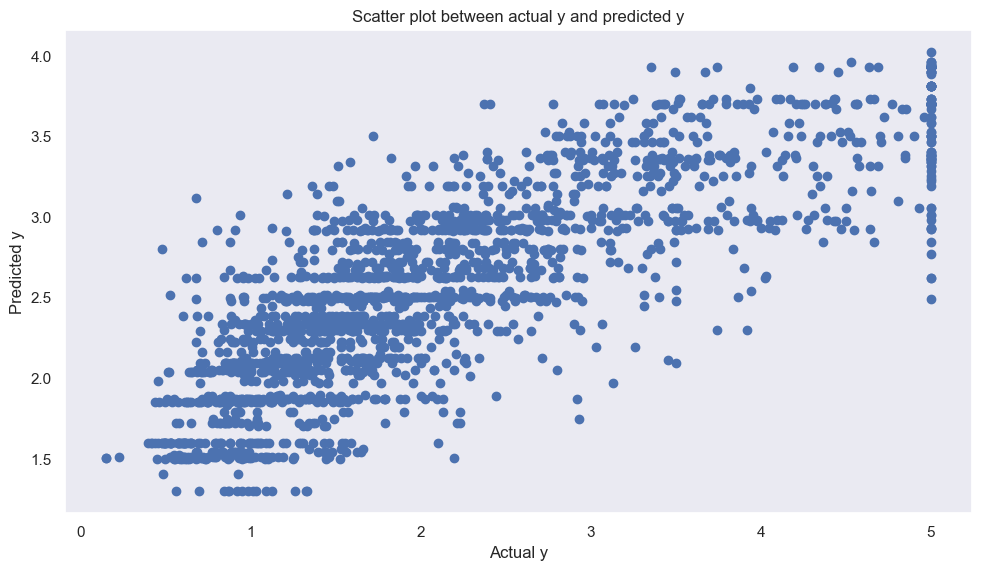

Mean Squared Error: 0.8862409981823095
R2 Score: 0.4462488101610703


In [125]:
plt.scatter(Y_test, mm3.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Scatter plot between actual y and predicted y")
plt.show()

print('Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, mm3.predict(X_test))))
print('R2 Score:', r2_score(Y_test, mm3.predict(X_test)))

### Поиск оптимальных гиперпараметров

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(mm3, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

print("Наилучшие гиперпараметры:", grid_search.best_params_)

Наилучшие гиперпараметры: {'learning_rate': 0.1, 'n_estimators': 50}


In [130]:
grid_search.best_score_

-0.5543139275426637

In [132]:
mm3=AdaBoostRegressor(random_state=1)
mm3.fit(X_train,Y_train)
y3_pred=mm3.predict(X_test)

In [134]:
rmse = (np.sqrt(mean_squared_error(Y_test,y3_pred)))
r2 = r2_score(Y_test, y3_pred)

print("The model perfomance for test set")
print("-------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

The model perfomance for test set
-------------------------------------
RMSE is 0.8862409981823095
R2 score is 0.4462488101610703




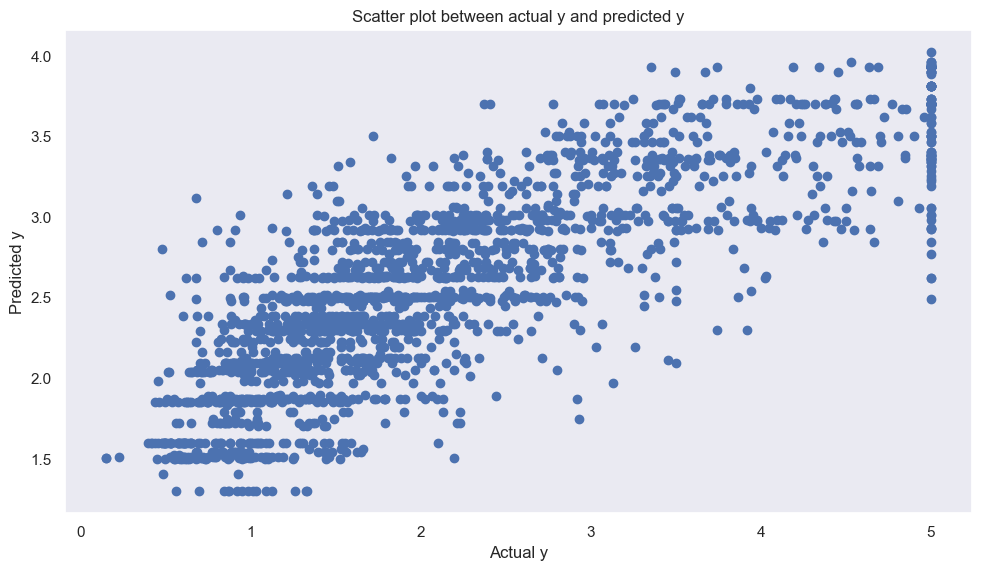

Mean Squared Error: 0.8862409981823095
R2 Score: 0.4462488101610703


In [136]:
plt.scatter(Y_test, mm3.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Scatter plot between actual y and predicted y")
plt.show()

print('Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, mm3.predict(X_test))))
print('R2 Score:', r2_score(Y_test, mm3.predict(X_test)))

In [138]:
mm1.feature_importances_

array([7.74915548e-01, 3.75344114e-02, 2.34034727e-02, 0.00000000e+00,
       3.65554260e-03, 1.37438158e-01, 2.23135767e-02, 7.39290040e-04])

In [140]:
mm2.feature_importances_

array([0.52025438, 0.05400558, 0.04761609, 0.02945807, 0.03248886,
       0.13680419, 0.08902886, 0.09034398])

In [142]:
mm3.feature_importances_

array([0.3232003 , 0.03382695, 0.07495986, 0.02361192, 0.05391918,
       0.11256279, 0.17711839, 0.2008006 ])

# VotingRegressor

In [145]:
from sklearn.ensemble import VotingRegressor
reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(random_state=0)
reg3= RandomForestRegressor(random_state=0,n_jobs=-1)
reg4= AdaBoostRegressor(random_state=1)
ereg=VotingRegressor(estimators=[('lr', reg1), ('dt', reg2), ('rf', reg3), ('ab', reg4)])
ereg=ereg.fit(X_train,Y_train)

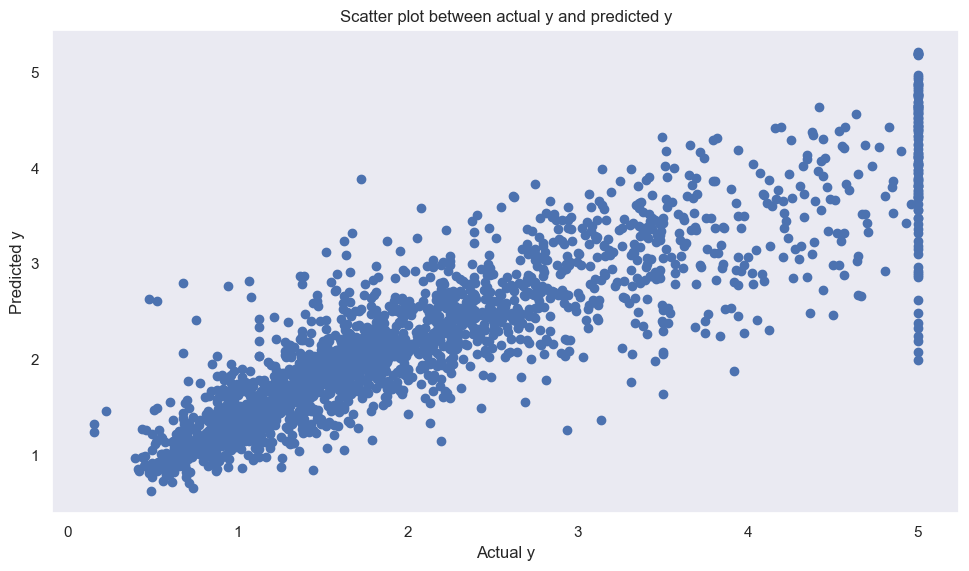

Mean Squared Error: 0.5919485070857851
R2 Score: 0.7529534134116509


In [147]:
plt.scatter(Y_test, ereg.predict(X_test))
plt.grid()
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Scatter plot between actual y and predicted y")
plt.show()

print('Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, ereg.predict(X_test))))
print('R2 Score:', r2_score(Y_test, ereg.predict(X_test)))

In [149]:
reg1.fit(X_train,Y_train)
reg2.fit(X_train,Y_train)
reg3.fit(X_train,Y_train)
reg4.fit(X_train,Y_train)

AdaBoostRegressor(random_state=1)

In [151]:
pred1=reg1.predict(X_test)
pred2=reg1.predict(X_test)
pred3=reg1.predict(X_test)
pred4=reg1.predict(X_test)

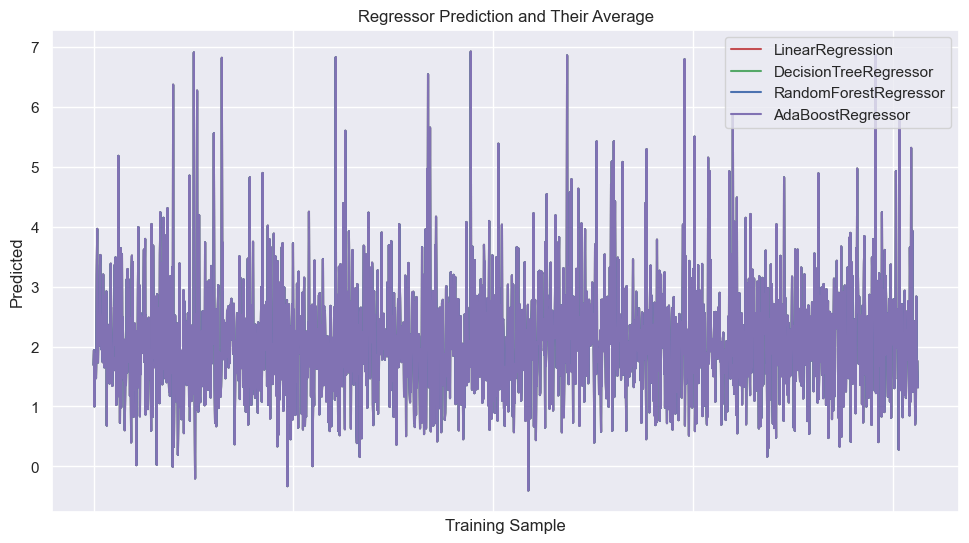

In [153]:
plt.figure()
plt.plot(pred1, "r-", label="LinearRegression")
plt.plot(pred1, "g-", label="DecisionTreeRegressor")
plt.plot(pred1, "b-", label="RandomForestRegressor")
plt.plot(pred1, "m-", label="AdaBoostRegressor")

plt.tick_params(axis='x', which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Training Sample")
plt.legend(loc="best")
plt.title("Regressor Prediction and Their Average")

plt.show()